# Prologue (Data Collection)

In [2]:
# # To request data with the ticker close price for the maximum number of years and save it.

# import sys
# sys.path.append('..')
# from src.data_fetch import fetch_prices
# import numpy as np

# tickers = ["AAPL","MSFT","asdasdasdsad"]
# prices=fetch_prices(tickers)

# # # Save the retrived datafile
# # prices.to_csv('../assets/data/prices.csv')
# # prices.to_pickle('../assets/data/prices.pkl')

# Main Plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.dates as mdates

import sys
sys.path.append('..')
from src.metrics import (
    simple_returns, portfolio_returns, cumulative_returns,
    rolling_vol, max_drawdown, historical_var, historical_cvar
)


# prices=pd.read_pickle("../assets/data/prices.pkl")
prices=pd.read_csv("../assets/data/prices.csv",header=[0,1],index_col=0,parse_dates=True)
close_prices=prices['Close']

# Overview
print(f"""
Close Prices Overview:
    Cols:{close_prices.columns.size}
    Rows:{close_prices.index.size}
      """)
close_prices.head()


Close Prices Overview:
    Cols:7
    Rows:11285
      


Ticker,AAPL,AMZN,GOOGL,MSFT,SPY,TLT,TSLA
Date,,,,,,,
1980-12-12,0.098485,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.093347,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.086495,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.088636,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.091206,NaN,NaN,NaN,NaN,NaN,NaN


# Test area

In [ ]:
close_prices.index.min().year

1980

In [ ]:
10000*(1+cum_ret)

Date
2010-06-30      9933.203943
2010-07-01      9850.508437
2010-07-02      9669.368293
2010-07-06      9590.854744
2010-07-07      9757.894980
                  ...      
2025-09-15    272005.225636
2025-09-16    272989.111626
2025-09-17    272623.113344
2025-09-18    271636.067932
2025-09-19    274811.693572
Length: 3830, dtype: float64

# Test area end

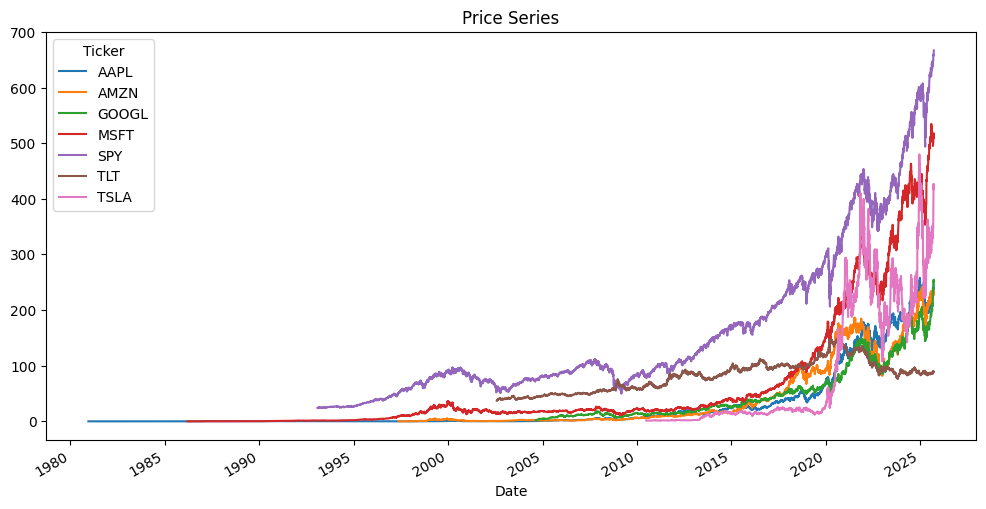

In [ ]:
close_prices.plot(figsize=(12,6),title='Price Series')
plt.show()

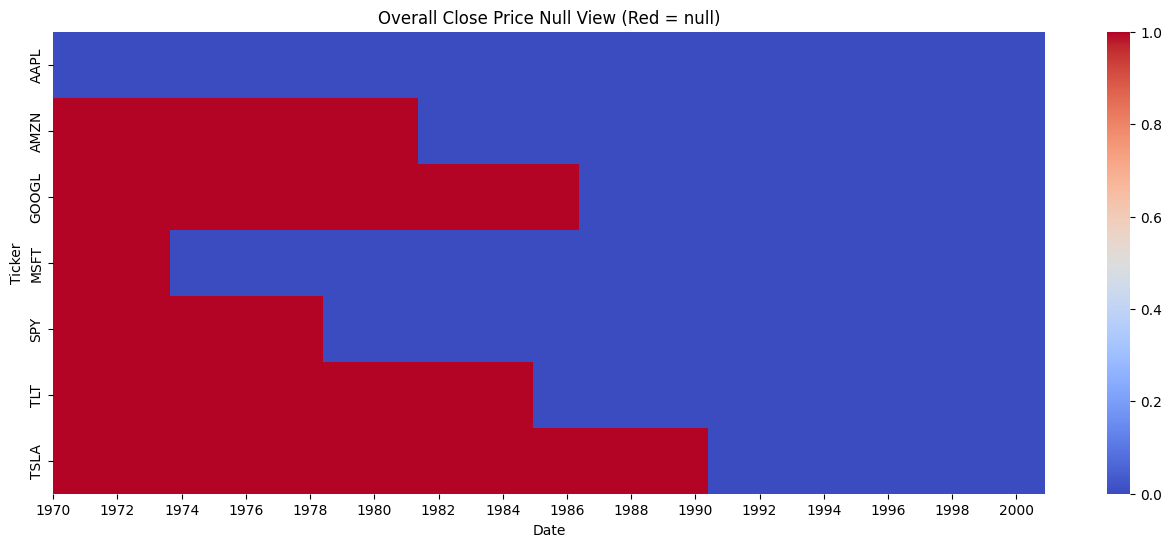

In [ ]:
# The nulls are because the stock didn't exist

plt.figure(figsize=(16, 6))
ax = sns.heatmap(close_prices.isna().T, cmap="coolwarm")
ax.set_xticks(range(len(close_prices.index)))
ax.set_xticklabels(close_prices.index)
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_title('Overall Close Price Null View (Red = null)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
close_prices=close_prices.dropna() # To get a non null based data

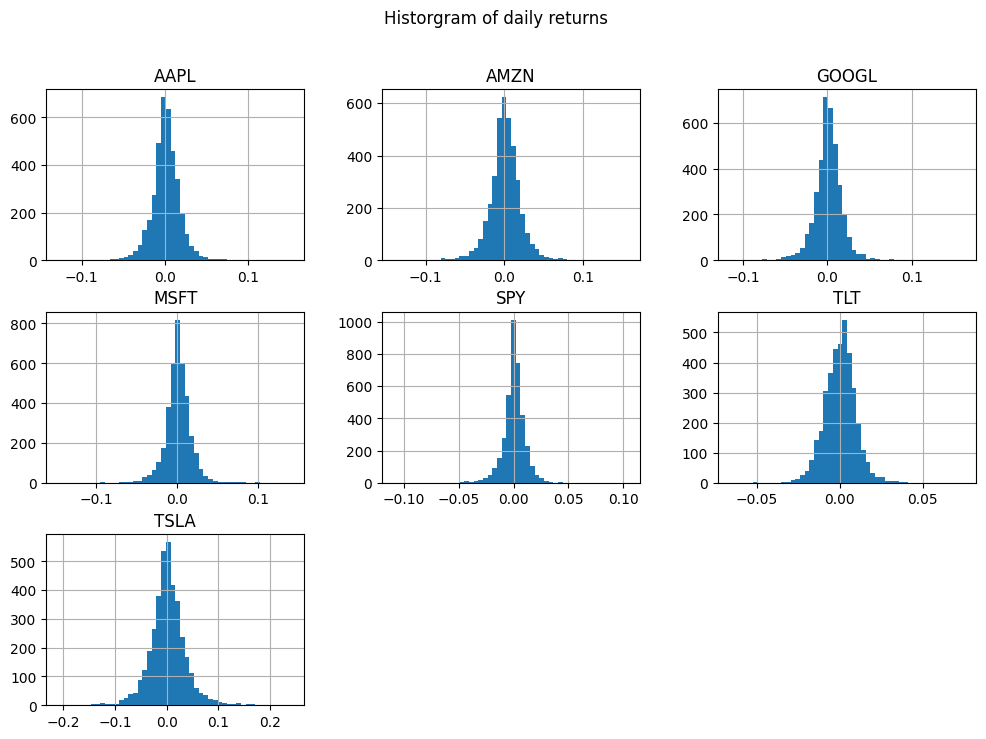

In [ ]:
returns=simple_returns(close_prices)
returns.head()

returns.hist(bins=50,figsize=(12,8))
plt.suptitle('Historgram of daily returns')
plt.show()

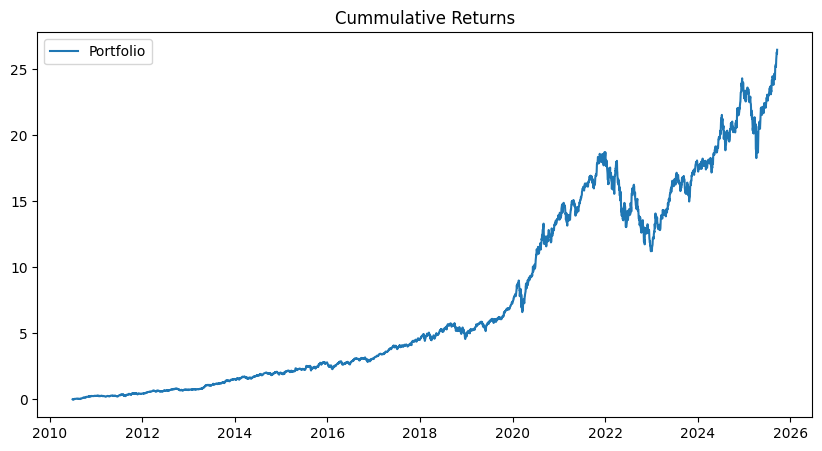

In [ ]:
tickers=close_prices.columns.tolist()
weights=np.array([0.15,0.15,0.15,0.15,0.1,0.2,0.1])
weights=weights/weights.sum()

port_ret=portfolio_returns(returns,weights)
cum_ret=cumulative_returns(port_ret)

plt.figure(figsize=(10,5))
plt.plot(cum_ret,label='Portfolio')
plt.title('Cummulative Returns')
plt.legend()
plt.show()

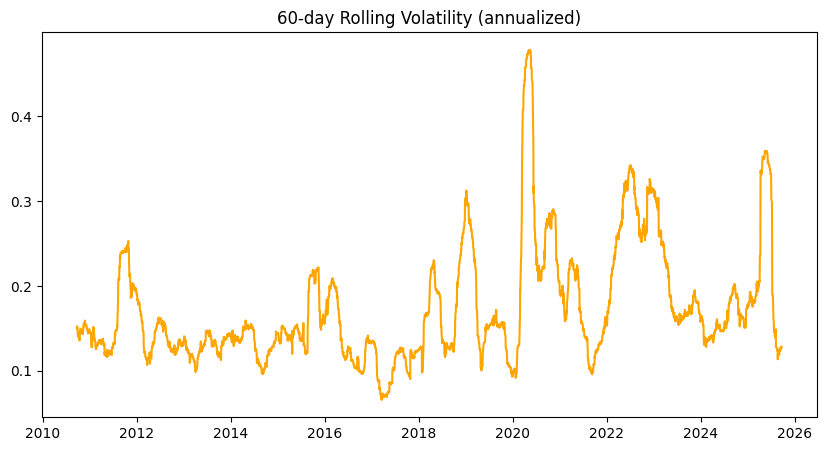

In [ ]:
window_size=60
roll_vol=rolling_vol(port_ret,window=window_size)

plt.figure(figsize=(10,5))
plt.plot(roll_vol, color='orange')
plt.title(f"{window_size}-day Rolling Volatility (annualized)")
plt.show()

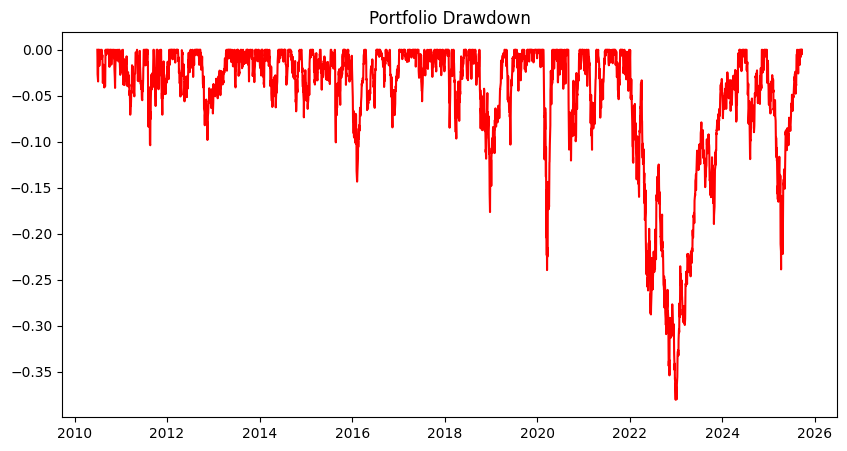

Max Drawdown value: -0.38055964261580477


In [ ]:
dd=max_drawdown(port_ret)

plt.figure(figsize=(10,5))
plt.plot(dd, color='red')
plt.title("Portfolio Drawdown")
plt.show()

print(f'Max Drawdown value: {dd.min()}')

Historical VaR(95%): 1.83%
Historical CVaR(95%): 2.68%


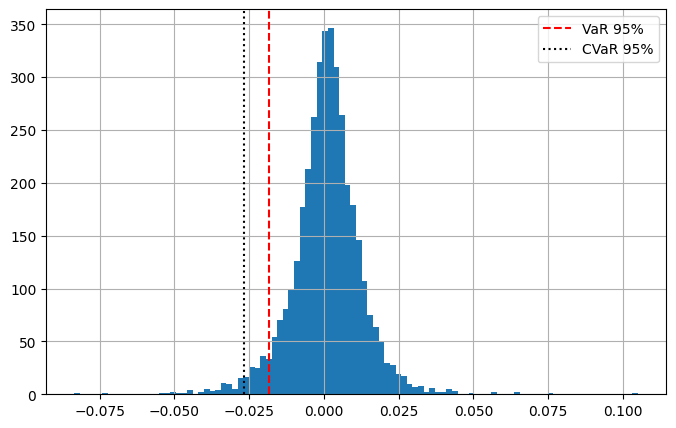

In [ ]:
var_95=historical_var(port_ret,0.05)
cvar_95=historical_cvar(port_ret,0.05)

print(f"Historical VaR(95%): {var_95:.2%}")
print(f"Historical CVaR(95%): {cvar_95:.2%}")

port_ret.hist(bins=100, figsize=(8,5))
plt.axvline(-var_95, color='r', linestyle='--', label='VaR 95%')
plt.axvline(-cvar_95, color='k', linestyle=':', label='CVaR 95%')
plt.legend()
plt.show()


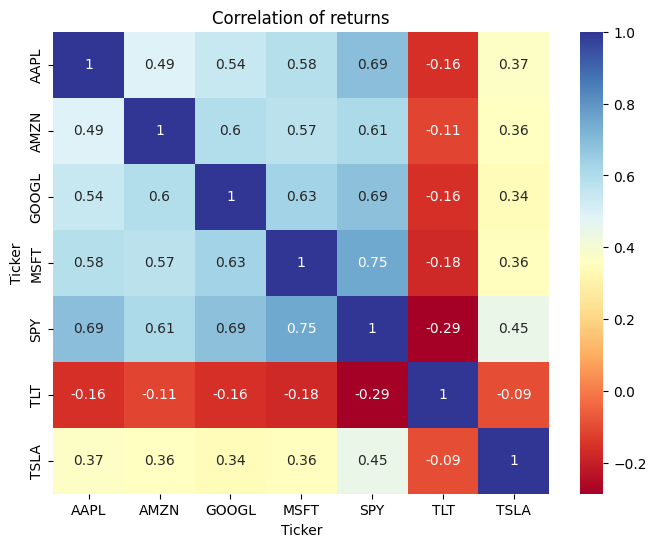

In [ ]:
corr=returns.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='RdYlBu')
plt.title('Correlation of returns')
plt.show()